In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(x, y=None, bins=10):
    """
    Plota um histograma com os dados fornecidos.

    Parâmetros:
    - x: lista ou array de valores do eixo x (dados).
    - y: lista ou array de pesos para cada valor de x (opcional).
    - bins: número de colunas (intervalos) para o histograma.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(x, bins=bins, weights=y, edgecolor='black')
    plt.xlabel('Timestamp')
    plt.ylabel('Frequência' if y is None else 'Peso acumulado')
    plt.title('Histograma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_17824/887799547.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(diff_bins, sort=False)


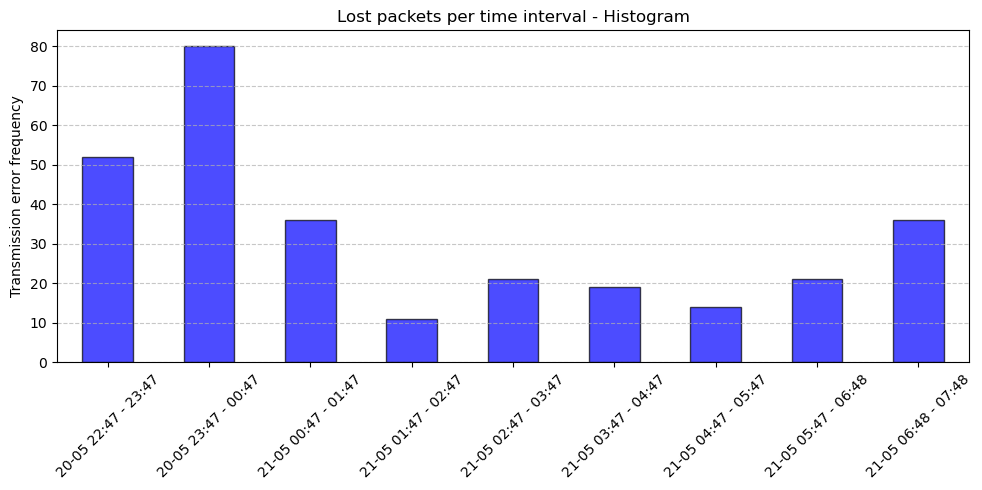

In [17]:
df_diff = pd.read_csv("./novos-dados/dados-diff.csv", sep=";", decimal=".")
df_sd = pd.read_csv("./novos-dados/dados-sd.csv", sep=";", decimal=".")


# Converter para datetime
df_sd["timestamp"] = pd.to_datetime(df_sd["timestamp"])
df_diff["timestamp"] = pd.to_datetime(df_diff["timestamp"])

# Criar limites dos bins com base no range de df_sd
start = df_sd["timestamp"].min()
end = df_sd["timestamp"].max()
columns = 9 #Define o número de colunas (intervalos) desejado
bins = pd.date_range(
    start=start, end=end, periods=columns + 1
)  # 9 intervalos = 10 bordas

# Aplicar pd.cut com os bins reais
diff_bins = pd.cut(df_diff["timestamp"], bins=bins)

# Contar a frequência de cada intervalo
freq = pd.value_counts(diff_bins, sort=False)

# Opcional: formatar os rótulos para facilitar a leitura
freq.index = [
    f'{i.left.strftime("%d-%m %H:%M")} - {i.right.strftime("%H:%M")}'
    for i in freq.index
]

# Plotar o histograma
plt.figure(figsize=(10, 5))
freq.plot(kind="bar", edgecolor="black", color="Blue", alpha=0.7)
plt.xlabel("")
plt.ylabel("Transmission error frequency")
plt.title("Lost packets per time interval - Histogram")
plt.xticks(rotation=45, ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()